In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

plt.rcParams['figure.figsize'] = (15, 8)

In [3]:
# Read csv files for data
ldf_regular = pd.read_csv('./LDF_REGULAR.csv', sep=';')
ldf_optimised = pd.read_csv('./LDF_OPTIMIZED.csv', sep=';')

In [4]:
# Do some number parsing
ldf_regular['mean total CPU'] = ldf_regular['mean cpu usage ldf'] + ldf_regular['mean cpu usage nginx']
ldf_optimised['mean total CPU'] = ldf_optimised['mean cpu usage ldf'] + ldf_optimised['mean cpu usage nginx']
ldf_regular['bandwidth per client'] = ldf_regular['mean bandwidth total'] / ldf_regular['number of clients']
ldf_optimised['bandwidth per client'] = ldf_optimised['mean bandwidth total'] / ldf_optimised['number of clients']

y = 0.234039x + 26.612004
y = 0.317121x + 27.621167


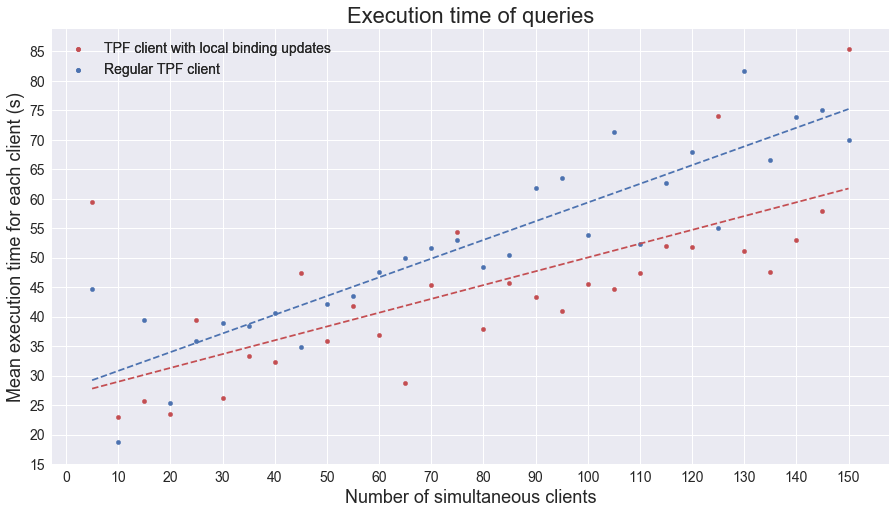

In [5]:
# Plot the mean execution time of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:30].plot(x = 'number of clients', y='mean execution time',kind='scatter', color='r', fontsize=14)
ax.set_title("Execution time of queries", fontdict=None, fontsize=22)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Mean execution time for each client (s)", fontdict=None, labelpad=None, fontsize=18)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:30].plot(x = 'number of clients', y = 'mean execution time', ax = ax, kind='scatter', color='b')
legend1 = plt.legend(["TPF client with local binding updates", "Regular TPF client", ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean execution time'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:30]['number of clients'])
ax.plot(ldf_optimised.iloc[0:30]['number of clients'], trendline, '--', color='r')
print("y = %.6fx + %.6f"%(z_optimised[0],z_optimised[1]))

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean execution time'], 1)
f_regular = np.poly1d(z_regular)
print("y = %.6fx + %.6f"%(z_regular[0],z_regular[1]))
trendline = f_regular(ldf_regular.iloc[0:30]['number of clients'])
ax.plot(ldf_regular.iloc[0:30]['number of clients'], trendline, '--', color='b')
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Mean execution time for each client (s)", fontdict=None, labelpad=None, fontsize=18)

plt.savefig('execution_time.pdf', bbox_inches='tight')

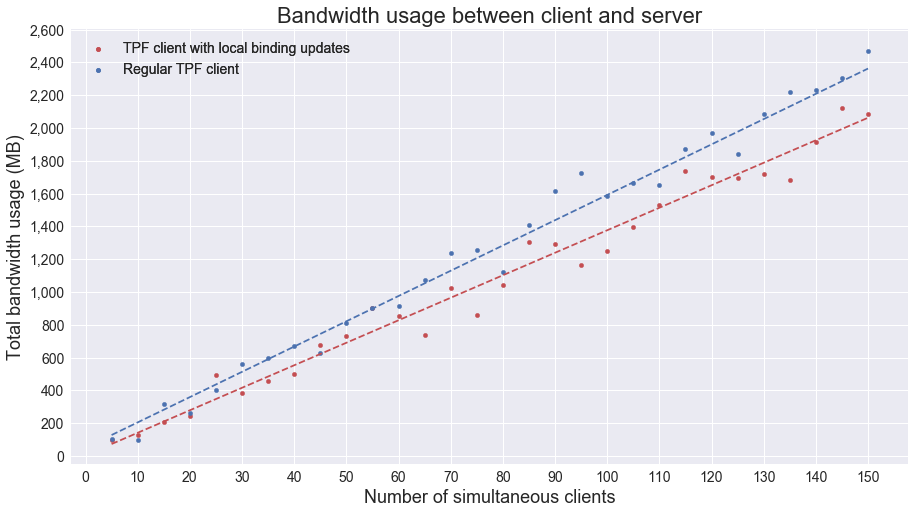

In [8]:
# Plot the mean bandwidth usage of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:30].plot(x = 'number of clients', y='mean bandwidth total', title="Bandwidth usage between client and server", figsize=(15, 8), kind='scatter', color='r', fontsize=14)
ax.set_title("Bandwidth usage between client and server", fontdict=None, fontsize=22)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Total bandwidth usage (MB)", fontdict=None, labelpad=None, fontsize=18)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:30].plot(x = 'number of clients', y='mean bandwidth total', kind='scatter', color='b', ax=ax)
legend1 = plt.legend(["TPF client with local binding updates", "Regular TPF client", ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean bandwidth total'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:30]['number of clients'])
ax.plot(ldf_optimised.iloc[0:30]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean bandwidth total'], 1)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:30]['number of clients'])
ax.plot(ldf_regular.iloc[0:30]['number of clients'], trendline, '--', color='b')
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Total bandwidth usage (MB)", fontdict=None, labelpad=None, fontsize=18)

plt.savefig('bandwidth.pdf', bbox_inches='tight')

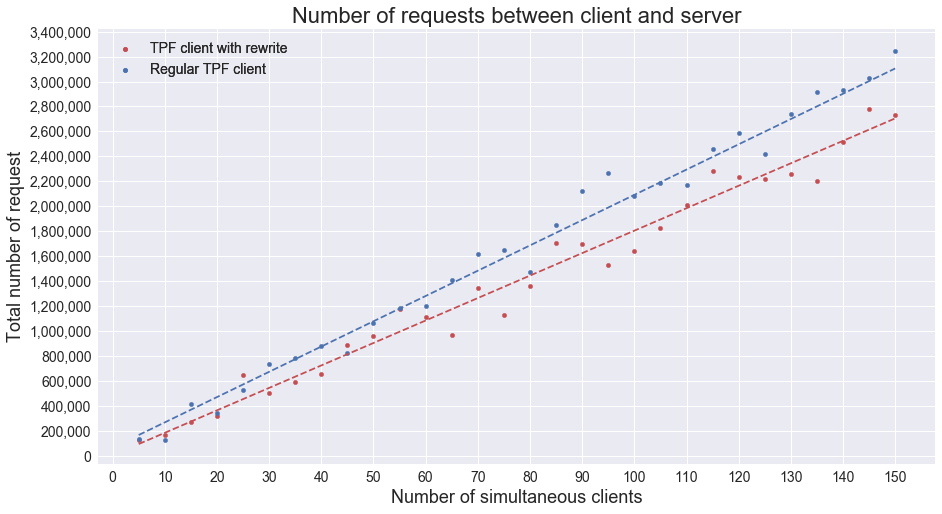

In [9]:
# Plot the mean requests usage of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:30].plot(x = 'number of clients', y='mean number of requests', title="Number of requests between client and server", figsize=(15, 8), kind='scatter', color='r', fontsize=14)
ax.set_title("Number of requests between client and server", fontdict=None, fontsize=22)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Total number of request", fontdict=None, labelpad=None, fontsize=18)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:30].plot(x = 'number of clients', y='mean number of requests', ax=ax, kind='scatter', color='b')
legend1 = plt.legend(["TPF client with rewrite", "Regular TPF client", ], prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean number of requests'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:30]['number of clients'])
ax.plot(ldf_optimised.iloc[0:30]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean number of requests'], 1)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:30]['number of clients'])
ax.plot(ldf_regular.iloc[0:30]['number of clients'], trendline, '--', color='b')

#legend2 = plt.legend(["y = %.6f * x + %.6f"%(z_optimised[0],z_optimised[1]), "y = %.6f * x + %.6f"%(z_regular[0],z_regular[1])], loc=4)
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Total number of request", fontdict=None, labelpad=None, fontsize=18)

#ax.add_artist(legend2)
plt.savefig('requests.pdf', bbox_inches='tight')

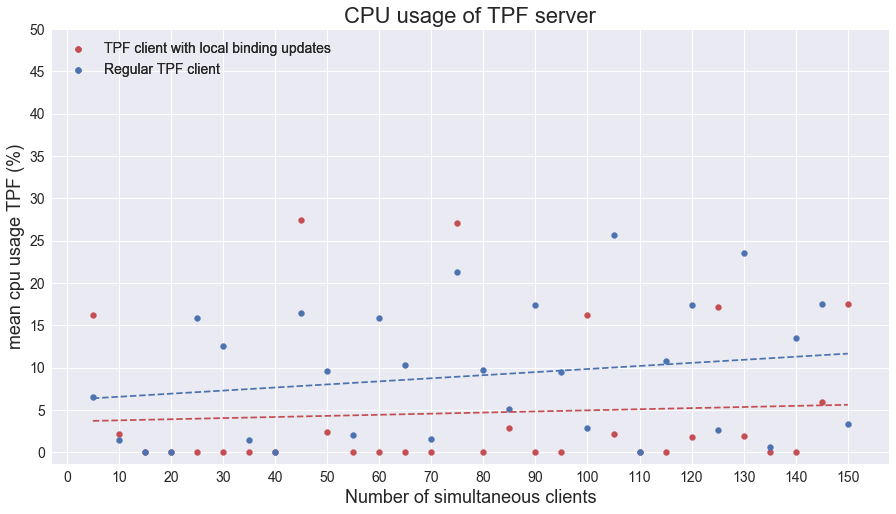

In [10]:
# Plot the mean requests usage of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:30].plot(x = 'number of clients', y='mean cpu usage ldf', title="CPU usage of TPF server", figsize=(15, 8), kind='scatter', color='r',s=36, fontsize=14)
ax.set_title("CPU usage of TPF server", fontdict=None, fontsize=22)
ax.set_ylim(ymax=50)
ldf_regular.iloc[0:30].plot(x = 'number of clients', y='mean cpu usage ldf', ax=ax, kind='scatter', color='b',s=36)
legend1 = plt.legend(["TPF client with local binding updates", "Regular TPF client", ], loc = 2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean cpu usage ldf'],1 )
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:30]['number of clients'])
ax.plot(ldf_optimised.iloc[0:30]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean cpu usage ldf'], 1)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:30]['number of clients'])
ax.plot(ldf_regular.iloc[0:30]['number of clients'], trendline, '--', color='b')

ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("mean cpu usage TPF (%)", fontdict=None, labelpad=None, fontsize=18)
#ax.add_artist(legend2)
plt.savefig('cpu_ldf.pdf', bbox_inches='tight')

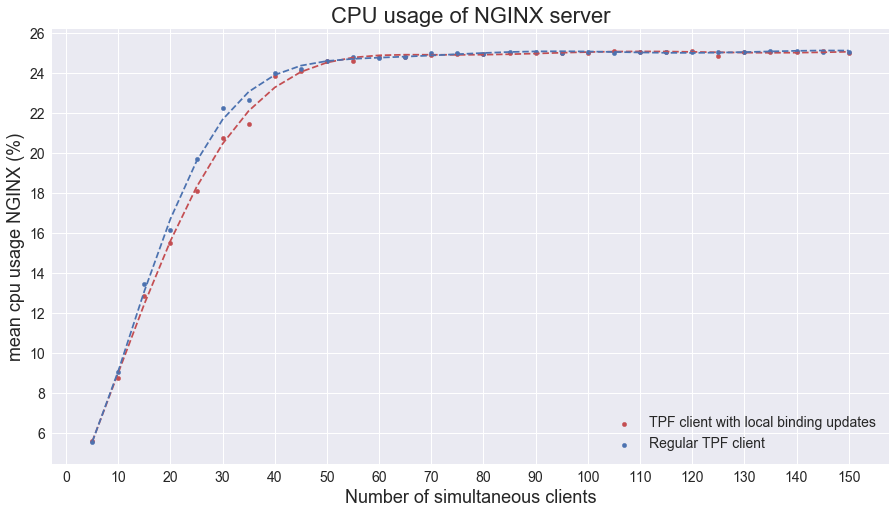

In [11]:
# Plot the mean requests usage of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:30].plot(x = 'number of clients', y='mean cpu usage nginx', title="CPU usage of NGINX server", figsize=(15, 8), kind='scatter', color='r', fontsize=14)
ax.set_title("CPU usage of NGINX server", fontdict=None, fontsize=22)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:30].plot(x = 'number of clients', y='mean cpu usage nginx', ax=ax, kind='scatter', color='b')
ax.legend(["TPF client with local binding updates", "Regular TPF client", ], prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean cpu usage nginx'], 10)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:30]['number of clients'])
ax.plot(ldf_optimised.iloc[0:30]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean cpu usage nginx'], 10)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:30]['number of clients'])
ax.plot(ldf_regular.iloc[0:30]['number of clients'], trendline, '--', color='b')
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=20)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("mean cpu usage NGINX (%)", fontdict=None, labelpad=None, fontsize=18)
plt.savefig('cpu_nginx.pdf', bbox_inches='tight')

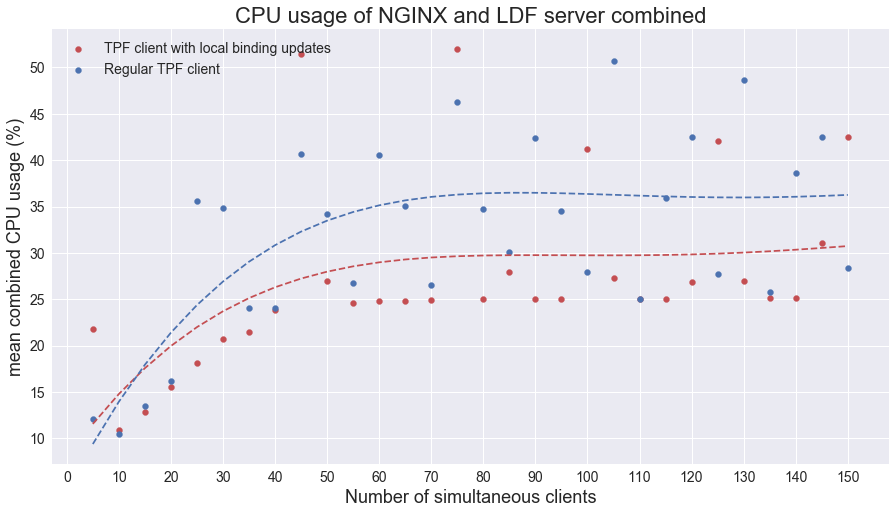

In [12]:
# Plot the total CPU usage (LDF + NGINX)
ax = ldf_optimised.iloc[0:30].plot(x = 'number of clients', y='mean total CPU', title="CPU usage of NGINX and TPF server combined", figsize=(15, 8), kind='scatter', color='r',s=36, fontsize=14)
ax.set_title("CPU usage of NGINX and LDF server combined", fontdict=None, fontsize=22)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:30].plot(x = 'number of clients', y='mean total CPU', ax=ax, kind='scatter', color='b',s=36)
ax.legend(["TPF client with local binding updates", "Regular TPF client", ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean total CPU'], 4)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:30]['number of clients'])
ax.plot(ldf_optimised.iloc[0:30]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean total CPU'], 4)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:30]['number of clients'])
ax.plot(ldf_regular.iloc[0:30]['number of clients'], trendline, '--', color='b')
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=15)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("mean combined CPU usage (%)", fontdict=None, labelpad=None, fontsize=18)
plt.savefig('cpu_total.pdf', bbox_inches='tight')

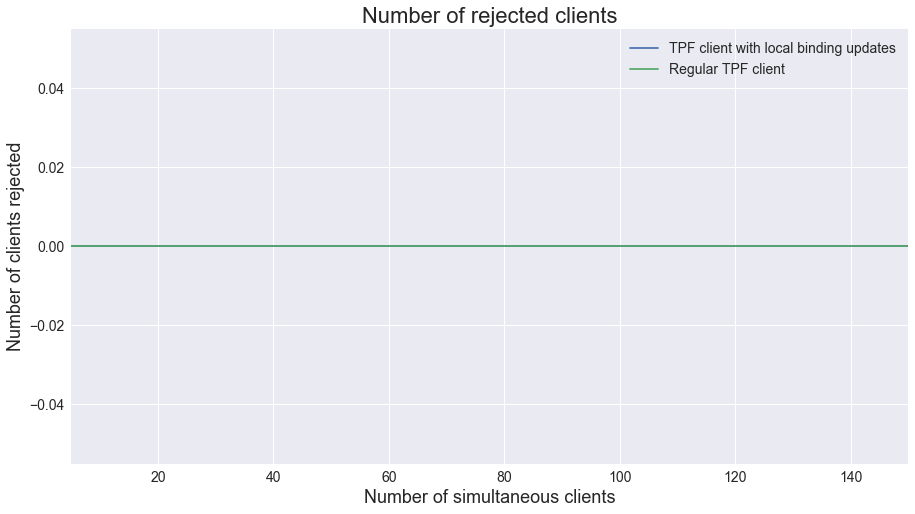

In [13]:
# Plot the rejections (LDF + NGINX)
ax = ldf_optimised.iloc[0:30].plot(x = 'number of clients', y='mean number of rejected', title="Number of rejected clients", figsize=(15, 8), fontsize=14)
ax.set_title("Number of rejected clients", fontdict=None, fontsize=22)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Number of clients rejected", fontdict=None, labelpad=None, fontsize=18)
ldf_regular.iloc[0:30].plot(x = 'number of clients', y='mean number of rejected', ax=ax)
ax.legend(["TPF client with local binding updates", "Regular TPF client", ], prop={'size': 14})
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Number of clients rejected", fontdict=None, labelpad=None, fontsize=18)

plt.savefig('rejected.pdf', bbox_inches='tight')